In [5]:
import numpy as np
from PIL import Image
from IPython.display import display

In [11]:
img = np.array(Image.open("../data/easy/24708.1_1 at 20X.jpg").convert('L'))

In [18]:
def threshold(origin_img, val):
    return np.where(origin_img > val, 255, 0)

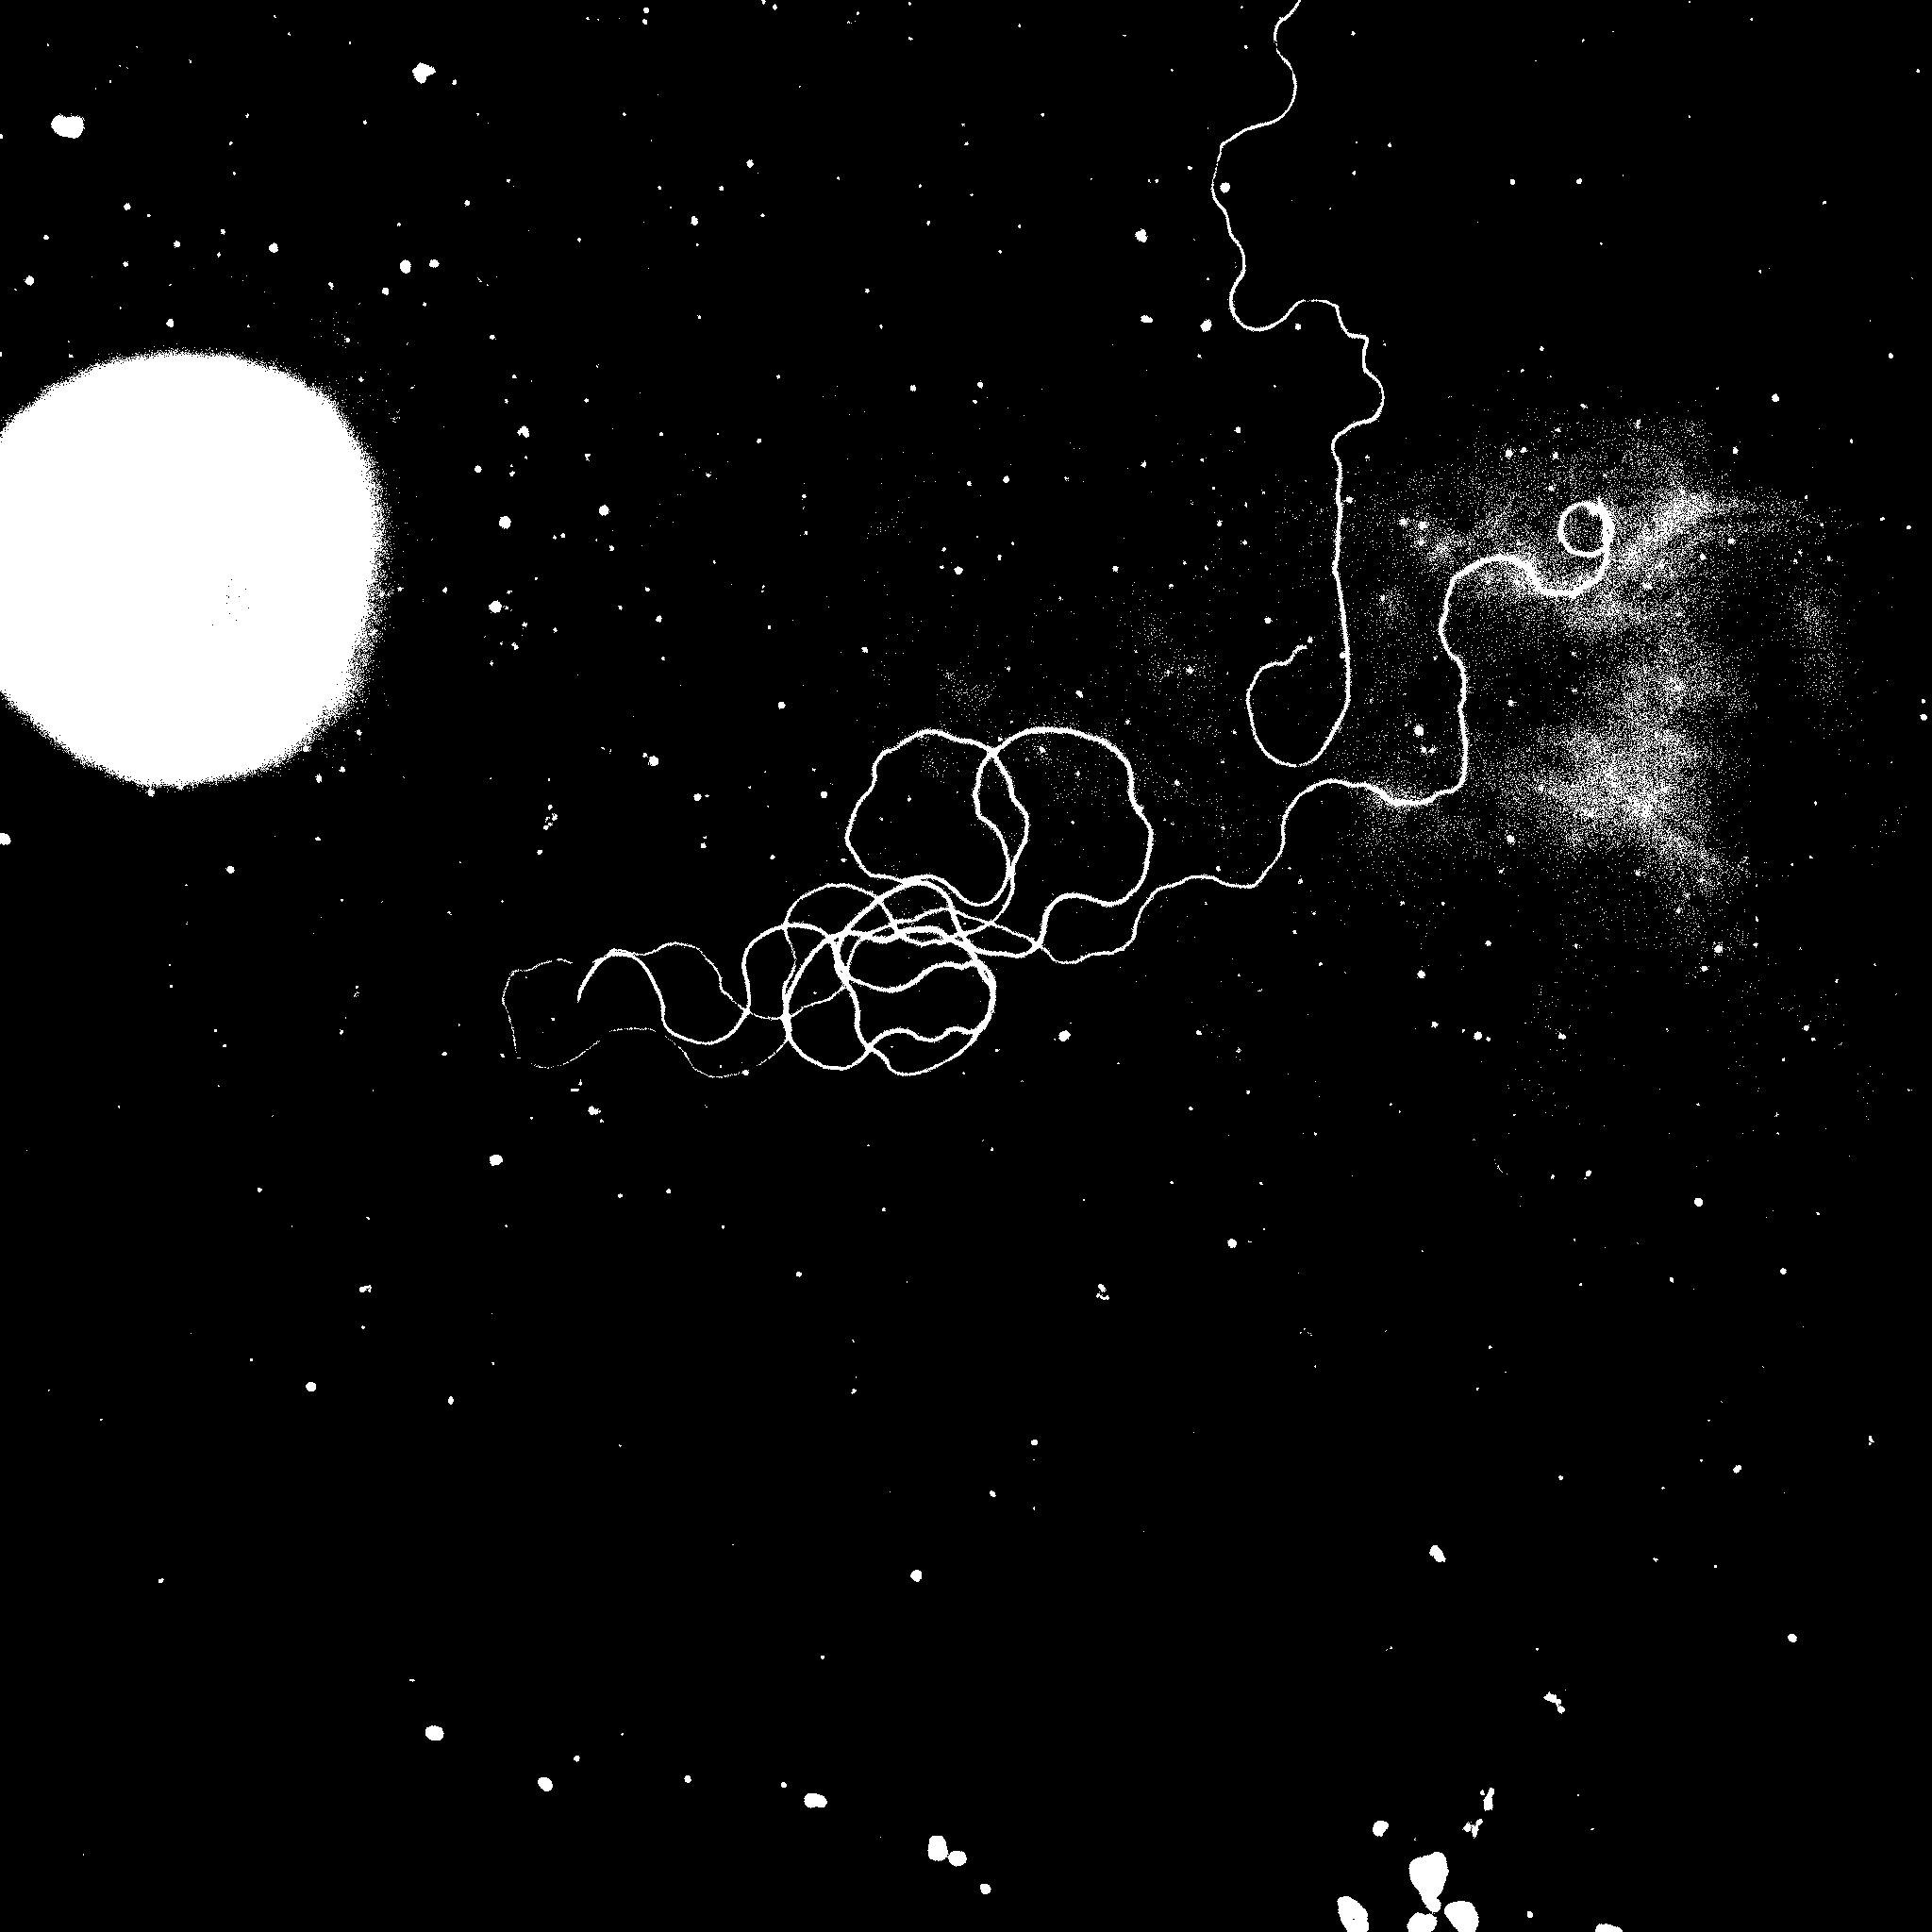

In [29]:
threshold_img = threshold(img, 185)
Image.fromarray(np.uint8(threshold_img))

In [39]:
import cv2
image = cv2.imread("test.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Define a range for red color for masking
lower_red = np.array([100, 0, 0])
upper_red = np.array([255, 100, 100])

# Threshold the image to get only red colors
mask = cv2.inRange(image_rgb, lower_red, upper_red)

# Bitwise-AND mask and original image to isolate the red circle's area
isolated_area = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Now we need to find the contours to identify the circle
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming the largest red contour is the circle we want
largest_contour = max(contours, key=cv2.contourArea)

# Create a black mask for the largest contour (which is our circle)
mask_of_largest_contour = np.zeros_like(mask)
cv2.drawContours(mask_of_largest_contour, [largest_contour], -1, [255], thickness=cv2.FILLED)

# Use this new mask to extract the inside of the red circle from the original image
final_result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_of_largest_contour)

In [40]:
test = np.array(Image.fromarray(final_result).convert("L"))

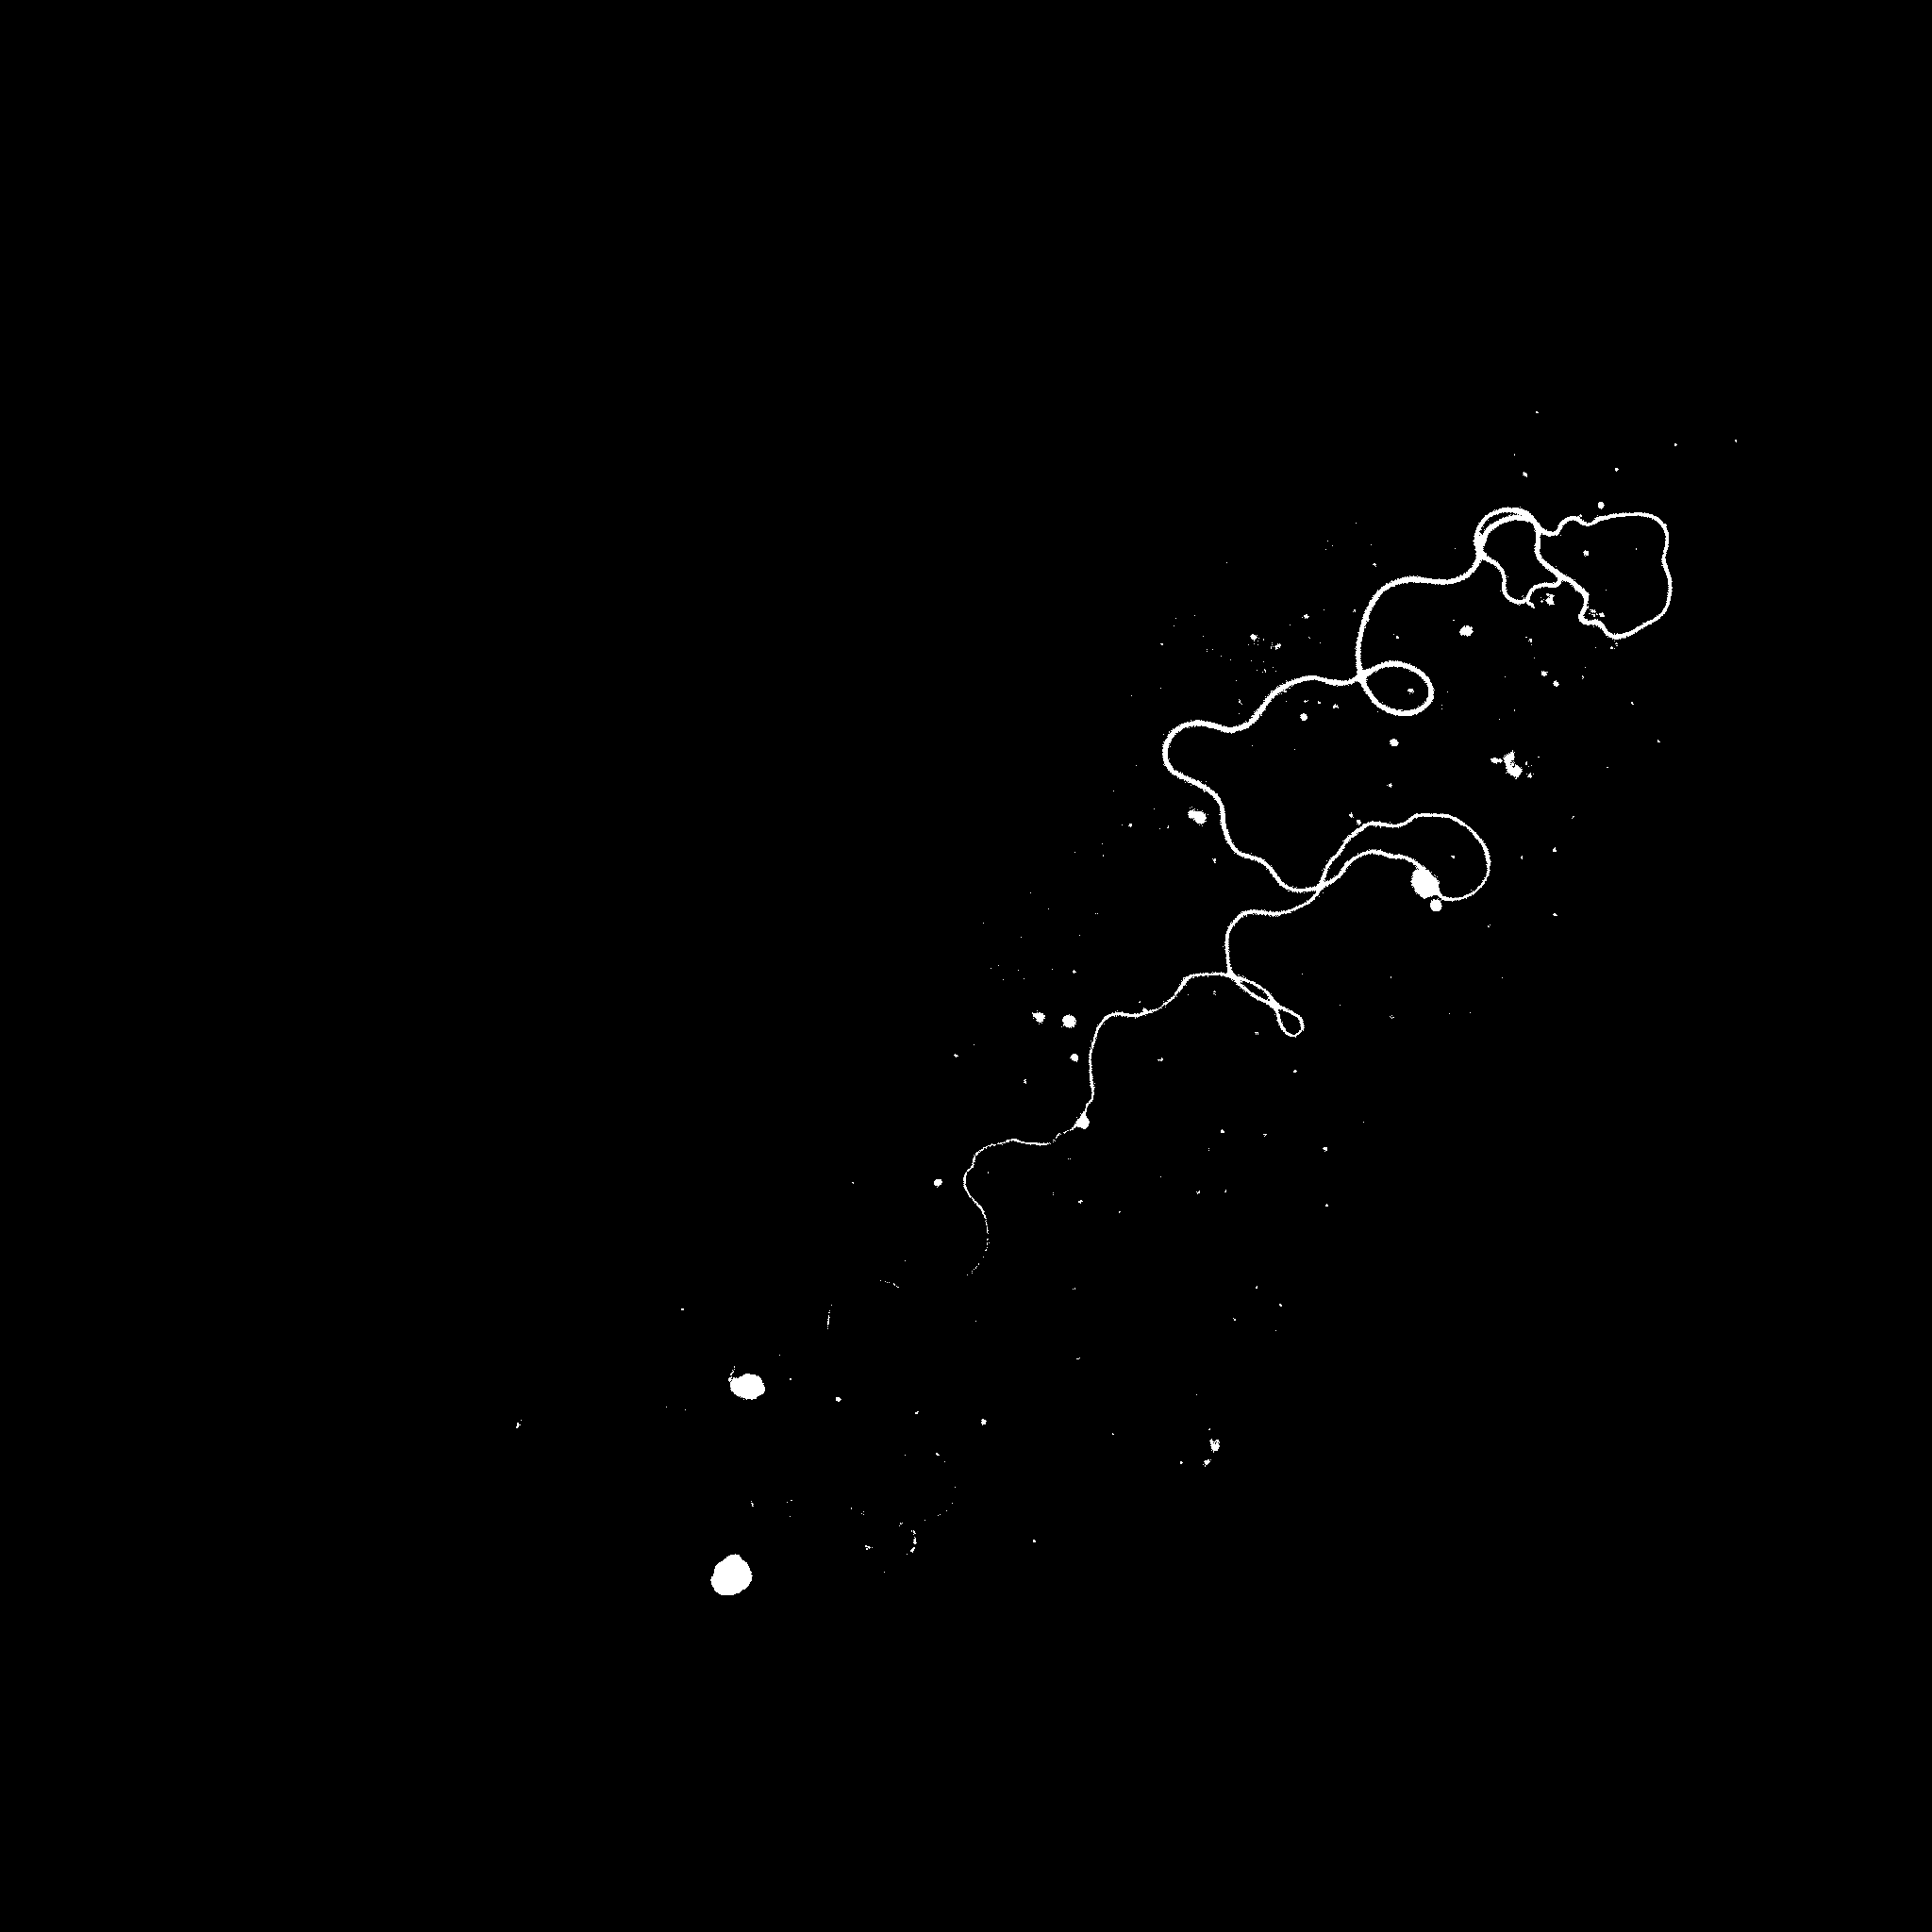

In [41]:
threshold_img = threshold(test, 185)
Image.fromarray(np.uint8(threshold_img))

In [42]:
threshold_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])